### Random Forest Model--

Importing of packages--

In [1]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

Read the data file--

In [2]:
def read_data():
    path="C:/top mentor data sci assignmets/4 jun/10. Random Forests"
    filename="/Company_Data.csv"
    data=pd.read_csv(path+filename)
    return data

print("Calling read_data function--")
data=read_data()
print(data)
print(data.shape)

Calling read_data function--
     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Educa

Print basic info about data--

In [3]:
print(data.columns)
print("==========================")
print("Data types---")
print(data.dtypes)
print("==========================")

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')
Data types---
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


Insights of data--

In [4]:
print("Average unit sales (in thousands)-",data["Sales"].mean())
print("Average price charged by competitor-",data['CompPrice'].mean())
print("Average Community income level (in thousands of dollars)-",data["Income"].mean())
print("Average advertising budget for company (in thousands of dollars)-",data["Advertising"].mean())
print("Average Population size in region (in thousands)-",data['Population'].mean())
print("Average price company charges for car seats at each site-",data["Price"].mean())
print("Levels indicating the quality of the shelving location for the car seats-",data["ShelveLoc"].unique())
print("Average age of the local population-",data["Age"].mean())
print("Average  Education level in population-",data["Education"].mean())
print("Highest  Education level in population-",data["Education"].max())
print("No of stores in Urban area-",len(data[data['Urban']=='Yes']))
print("No of stores in Rural area-",len(data[data['Urban']=='No']))
print("No of stores in US-",len(data[data['US']=='Yes']))

Average unit sales (in thousands)- 7.496325
Average price charged by competitor- 124.975
Average Community income level (in thousands of dollars)- 68.6575
Average advertising budget for company (in thousands of dollars)- 6.635
Average Population size in region (in thousands)- 264.84
Average price company charges for car seats at each site- 115.795
Levels indicating the quality of the shelving location for the car seats- ['Bad' 'Good' 'Medium']
Average age of the local population- 53.3225
Average  Education level in population- 13.9
Highest  Education level in population- 18
No of stores in Urban area- 282
No of stores in Rural area- 118
No of stores in US- 258


Checking for missing values--

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


<AxesSubplot:>

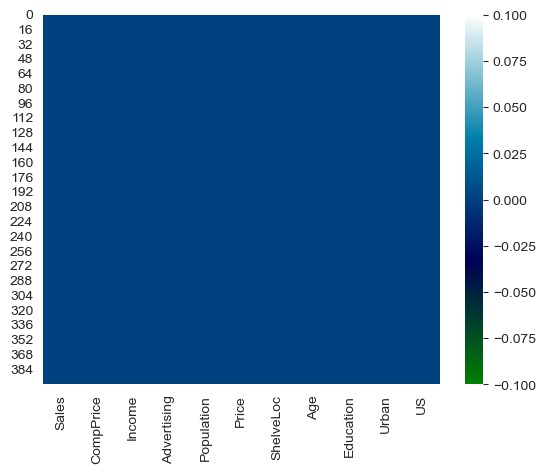

In [5]:
print(data.isnull().sum())
sns.heatmap(data.isnull(),cmap="ocean")

We have to build a Random Forest model with target variable 'Sales'. Thus,we will first convert it in categorical variable.

In [6]:
Sales_worth=pd.cut(np.array(data["Sales"].values),3, labels=["Low", "Medium", "High"])
data["Sales_worth"]=Sales_worth
data.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_worth
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,Medium


Now, we will use OrdinalEncoder() to transform Categorical values of ['ShelveLoc','Urban', 'US'] columns to ordinal one.

In [7]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['ShelveLoc','Urban', 'US'])
data=encoder.fit_transform(data)
data.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_worth
0,9.50,138,73,11,276,120,1,42,17,1,1,Medium
1,11.22,111,48,16,260,83,2,65,10,1,1,High
2,10.06,113,35,10,269,80,3,59,12,1,1,Medium
3,7.40,117,100,4,466,97,3,55,14,1,1,Medium
4,4.15,141,64,3,340,128,1,38,13,1,2,Low
5,10.81,124,113,13,501,72,1,78,16,2,1,Medium


Exploratory Data Analysis--<br>
Checking for outliers--

<AxesSubplot:>

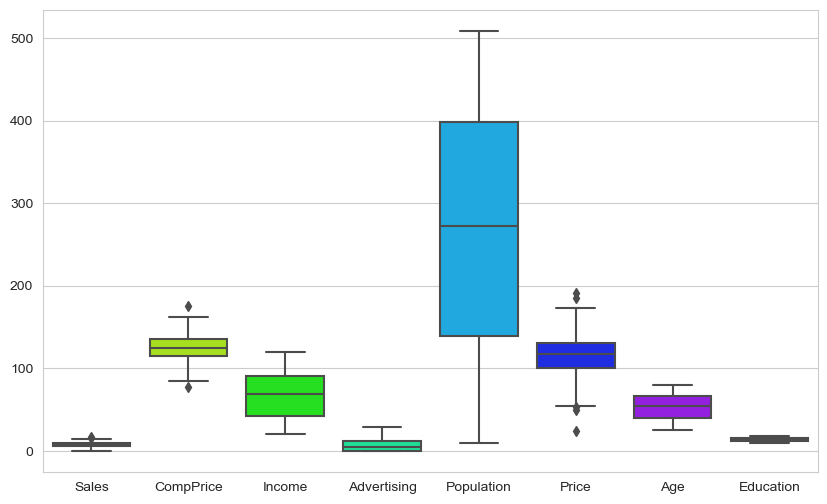

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.loc[:,['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']],palette="hsv")

CompPrice and Price columns are showing outliers but they can vary.

7.496325
0.18556036318721578


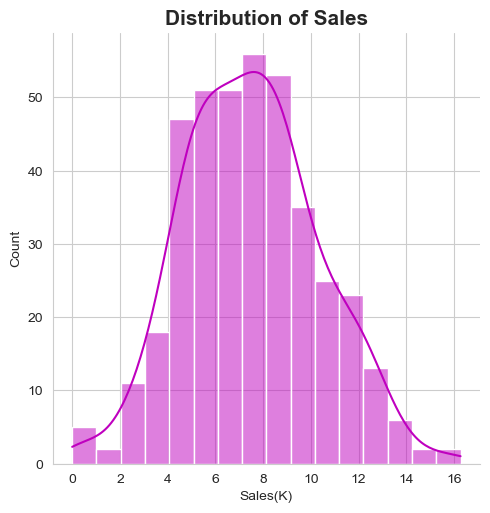

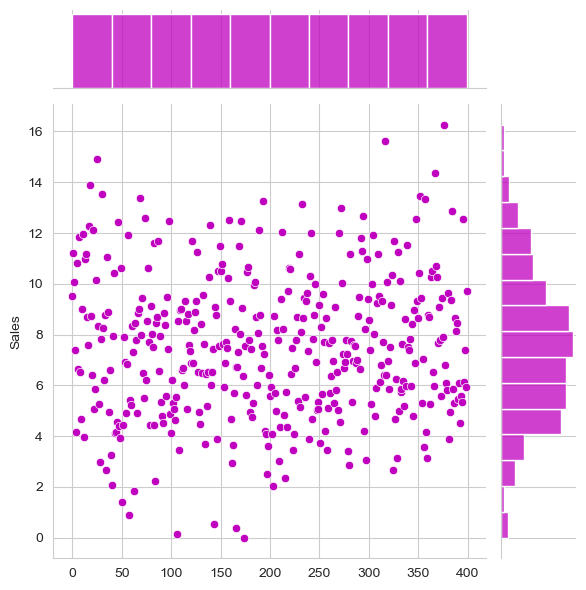

In [9]:
sns.displot(data=data['Sales'],color="m",kde=True)
plt.title("Distribution of Sales",fontweight="bold",fontsize=15)
plt.xlabel("Sales(K)")
sns.jointplot(data=data['Sales'],color="m")
print(data["Sales"].mean())
print(data["Sales"].skew())

Sales values are uniformly distributed with mean sale of around 7.496 Thousands.

Text(0.5, 1.0, 'Countplot of Sales worth')

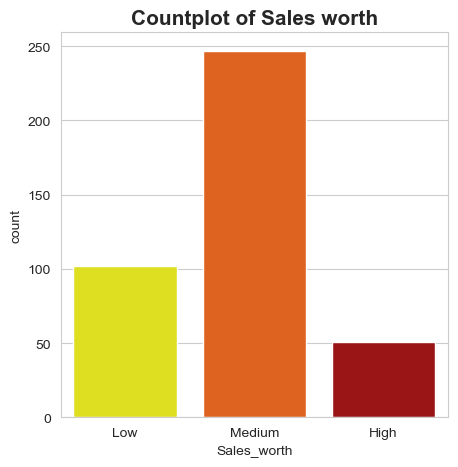

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Sales_worth'],palette="hot_r")
plt.title("Countplot of Sales worth",fontweight="bold",fontsize=15)

For majority of stores sale is medium.

Text(0.5, 1.0, 'Distribution of CompPrice')

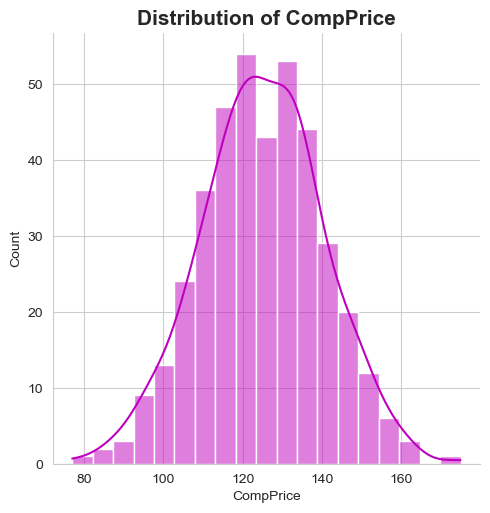

In [11]:
sns.displot(x="CompPrice",data=data,kde=True,color="m")
data['CompPrice'].skew()
plt.title("Distribution of CompPrice",fontweight="bold",fontsize=15)

CompPrice values are uniformly distributed.<br>
(CompPrice=Price charged by competitor) 

Mean income level 68.6575


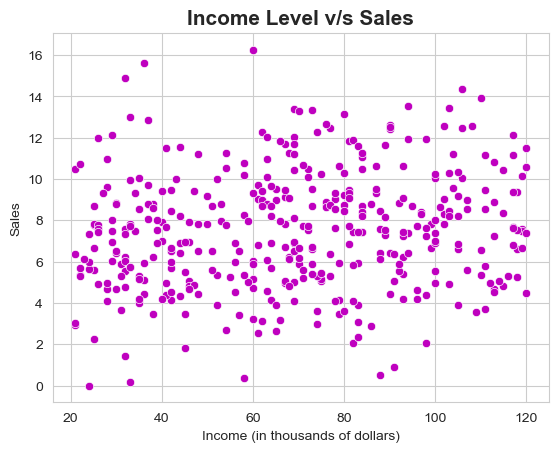

In [12]:
sns.scatterplot(x="Income",y="Sales",data=data,color="m")
plt.xlabel("Income (in thousands of dollars)")
plt.title("Income Level v/s Sales",fontweight="bold",fontsize=15)
print("Mean income level",data['Income'].mean())

Text(0.5, 1.0, 'Distribution of Community Income Level')

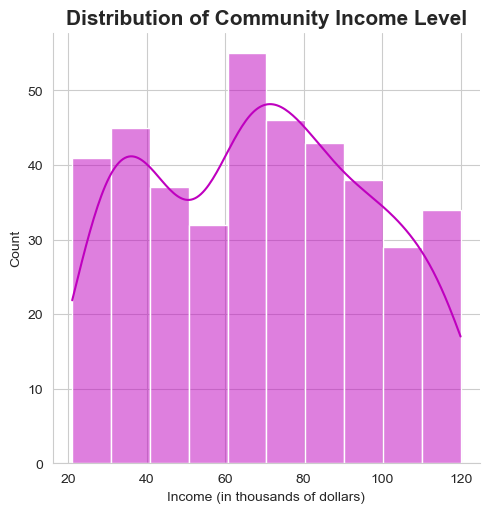

In [13]:
sns.displot(x=data["Income"],data=data,color="m",kde=True)
plt.xlabel("Income (in thousands of dollars)")
plt.title("Distribution of Community Income Level",fontweight="bold",fontsize=15)

Average Community income level ranges from 60-80 thousands of dollars.

Mean advertising budget- 6.635


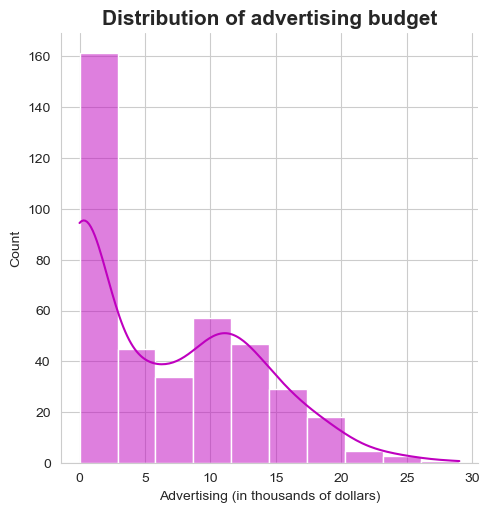

In [14]:
sns.displot(x=data["Advertising"],data=data,color="m",kde=True)
plt.xlabel("Advertising (in thousands of dollars)")
plt.title("Distribution of advertising budget",fontweight="bold",fontsize=15)
print("Mean advertising budget-",data['Advertising'].mean())

At around 160 stores advertising budget is low ranging between 0 to 2.5 thousands of dollars.

Text(0.5, 1.0, 'Advertising v/s Sales')

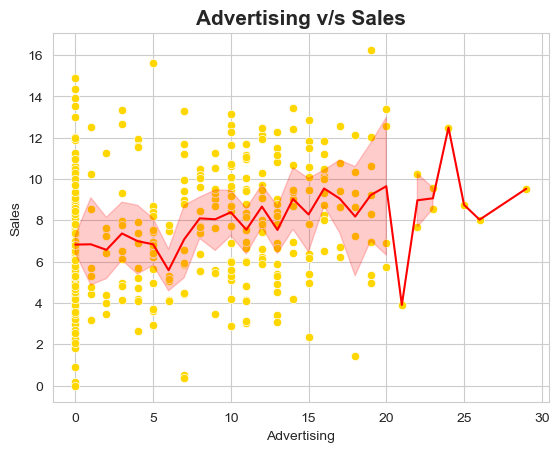

In [15]:
sns.scatterplot(x="Advertising",y="Sales",data=data,color="gold")
sns.lineplot(x="Advertising",y="Sales",data=data,color="r")
plt.title("Advertising v/s Sales",fontweight="bold",fontsize=15)

From above plot, we can remark that Gross sales rises at some stores with high Advertising budget.

Text(0.5, 1.0, 'Distribution of Population size in region')

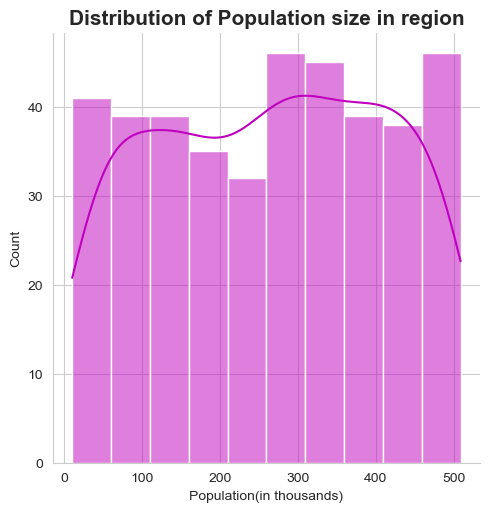

In [16]:
sns.displot(x=data["Population"],data=data,color="m",kde=True)
plt.xlabel("Population(in thousands)")
plt.title("Distribution of Population size in region",fontweight="bold",fontsize=15)

More than 40 regions have maximun population ranging between 450-500 thousands.

([<matplotlib.axis.XTick at 0x156084e1eb0>,
 [Text(0, 0, 'Bad'), Text(1, 0, 'Good'), Text(2, 0, 'Medium')])

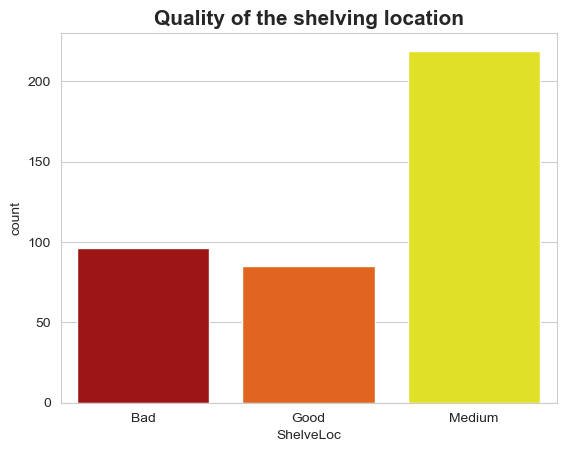

In [17]:
sns.countplot(x=data["ShelveLoc"],palette="hot")
plt.title("Quality of the shelving location",fontweight="bold",fontsize=15)
plt.xticks((0,1,2), ["Bad","Good","Medium"], rotation ='horizontal')

At 200 plus stores quality of the shelving location for the car seats is Medium.

Text(0.5, 1.0, 'Shelving location V/S Sales')

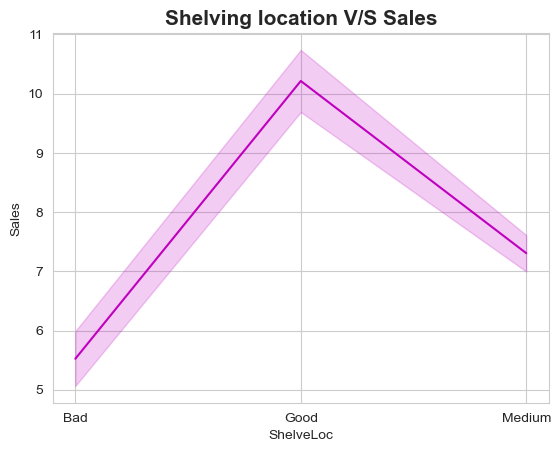

In [18]:
sns.lineplot(x="ShelveLoc",y="Sales",data=data,color="m")
plt.xticks((1,2,3), ["Bad","Good","Medium"], rotation ='horizontal')
plt.title("Shelving location V/S Sales",fontweight="bold",fontsize=15)

Above lineplot indicates that if quality of the shelving location is good sales rises.

Text(0.5, 1.0, 'Age v/s Sales')

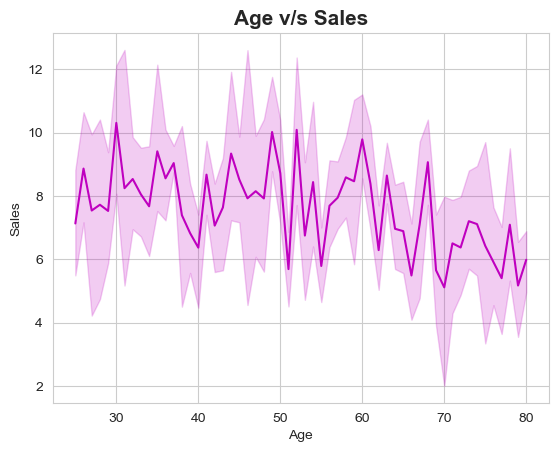

In [19]:
sns.lineplot(x="Age",y="Sales",data=data,color="m")
plt.title("Age v/s Sales",fontweight="bold",fontsize=15)

From the above lineplot we can observe that,with aged population there is a slight decrease in the sales values.

1    282
2    118
Name: Urban, dtype: int64


Text(0.5, 1.0, 'Store Location')

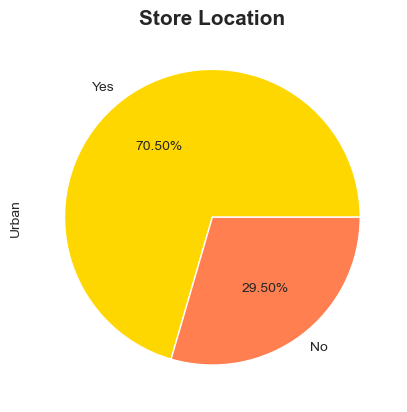

In [20]:
data["Urban"].value_counts().plot(kind="pie",autopct='%.2f%%',colors=["gold",'coral'],labels=["Yes","No"])
print(data["Urban"].value_counts())
plt.title("Store Location",fontweight="bold",fontsize=15)

70.50% stores are loacted in Urban area.

1    258
2    142
Name: US, dtype: int64


Text(0.5, 1.0, 'US Location')

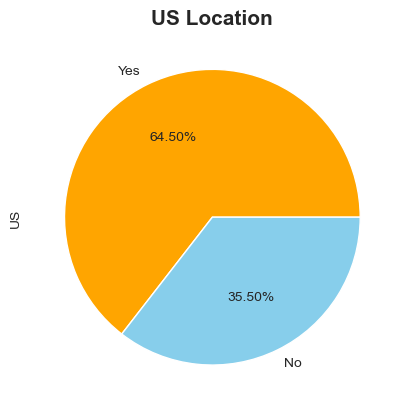

In [21]:
data["US"].value_counts().plot(kind="pie",autopct='%.2f%%',colors=["ORANGE",'SKYBLUE'],labels=["Yes","No"])
print(data["US"].value_counts())
plt.title("US Location",fontweight="bold",fontsize=15)

64.50% stores are loacted in US area.

Text(0.5, 0, 'Urban v/s Rural')

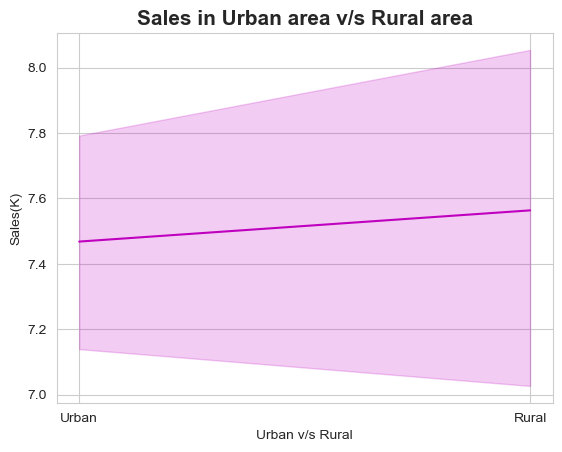

In [22]:
sns.lineplot(x="Urban",y="Sales",data=data,color="m")
plt.title("Sales in Urban area v/s Rural area",fontweight="bold",fontsize=15)
plt.xticks((1,2), ["Urban","Rural"], rotation ='horizontal')
plt.ylabel("Sales(K)")
plt.xlabel("Urban v/s Rural")

From above lineplot, we can say that average sales of stores in Rural area is slightly more.

Text(0.5, 0, 'US v/s Outside')

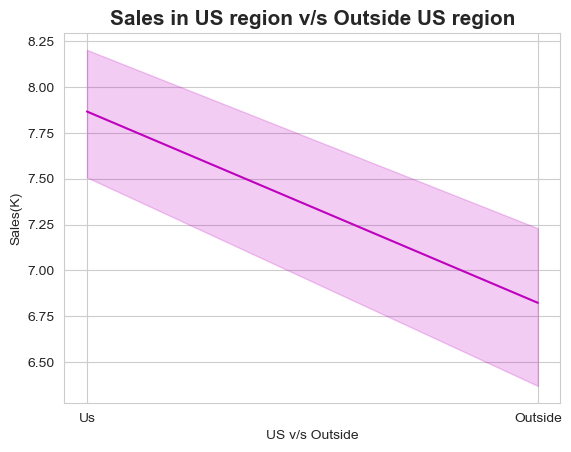

In [23]:
sns.lineplot(x="US",y="Sales",data=data,color="m")
plt.title("Sales in US region v/s Outside US region",fontweight="bold",fontsize=15)
plt.xticks((1,2), ["Us","Outside"], rotation ='horizontal')
plt.ylabel("Sales(K)")
plt.xlabel("US v/s Outside")

From above lineplot, we can say that average sales in the US region is high.

In [24]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,0.015419,-0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,-0.066594,-0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,-0.037967,-0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,-0.042035,-0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,0.052025,-0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,-0.047016,-0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,0.063978,0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,-0.028479,-0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,0.033094,0.078250
Urban,0.015419,-0.066594,-0.037967,-0.042035,0.052025,-0.047016,0.063978,-0.028479,0.033094,1.000000,0.047085


<AxesSubplot:>

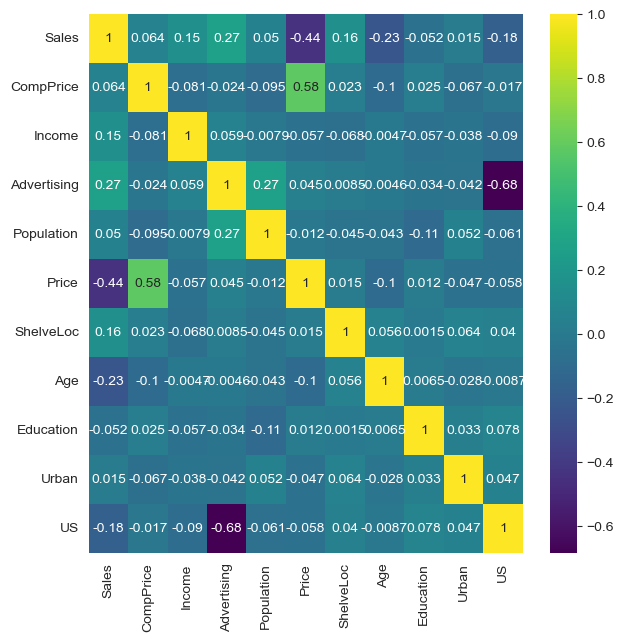

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,cmap="viridis")

### "Building a model--"

#### We have to build a model to know about attributes causing high sale--

Calling train_test function--
(280, 10)
(280,)
(120, 10)
(120,)
Calling modelling function--
Model training is completed.
Calling prediction function--
Pred Sales values-- ['Medium' 'High' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Low' 'Low' 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Low' 'Medium' 'High' 'Low'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'High' 'Medium' 'Low' 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Low' 'Medium'
 'Medium' 'High' 'Medium' 'Medium' 'Mediu

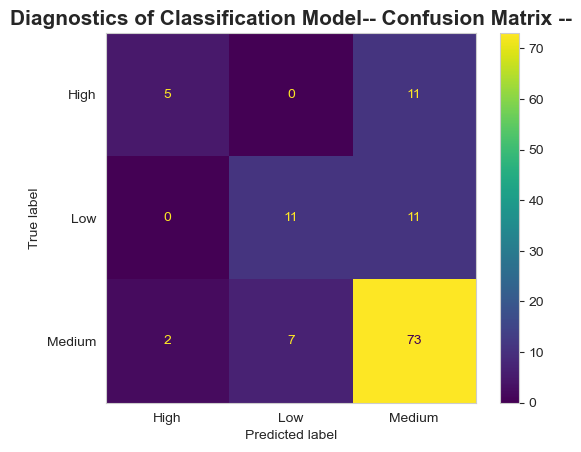

*********************************************
Accuracy score-- 74.167
Misclassification-- 0.2583333333333333
Classification Report--
              precision    recall  f1-score   support

        High       0.71      0.31      0.43        16
         Low       0.61      0.50      0.55        22
      Medium       0.77      0.89      0.82        82

    accuracy                           0.74       120
   macro avg       0.70      0.57      0.60       120
weighted avg       0.73      0.74      0.72       120



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=data.iloc[:,1:11]
y=data.iloc[:,11]

def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return X_train,X_test,y_train,y_test
print("Calling train_test function--")
X_train,X_test,y_train,y_test=train_test(X,y)

def modelling():
    model=RandomForestClassifier(criterion="gini",max_depth=15)
    model_train=model.fit(X_train,y_train)
    print("Model training is completed.")
    return model_train
print("Calling modelling function--")
model_train=modelling()

def prediction():
    pred=model_train.predict(X_test)
    return pred
print("Calling prediction function--")
pred=prediction()
print("Pred Sales values--",pred)
print("***************************************")

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
result=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Model-- Confusion Matrix --",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()
print("*********************************************")

accuracy_score(y_test,pred)
1-accuracy_score(y_test,pred)
classification_report(y_test,pred)
print("Accuracy score--",round(accuracy_score(y_test,pred)*100,3))
print( "Misclassification--",1-accuracy_score(y_test,pred))
print("Classification Report--")
print(classification_report(y_test,pred))

Lets change the criterion to "entropy".

Calling modelling function--
Model training is completed.
Calling prediction function--
Pred Sales values-- ['Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Low' 'Low' 'High' 'Low' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Low' 'Medium' 'High' 'Low'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'High' 'Low' 'Low' 'Medium' 'Medium' 'Low' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Low' 'Medium'
 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'Low' 'Low' 'Medium' 'Medium'
 'Medium' 'Low' 'Medium' 'Medium' 'L

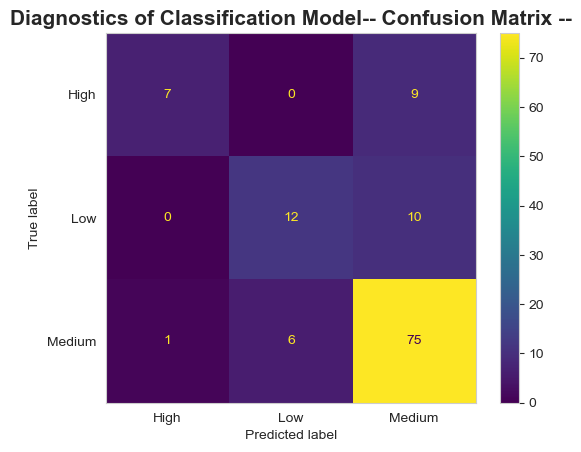

*********************************************
Accuracy score-- 78.333
Misclassification-- 0.21666666666666667
Classification Report--
              precision    recall  f1-score   support

        High       0.88      0.44      0.58        16
         Low       0.67      0.55      0.60        22
      Medium       0.80      0.91      0.85        82

    accuracy                           0.78       120
   macro avg       0.78      0.63      0.68       120
weighted avg       0.78      0.78      0.77       120



In [27]:
def modelling():
    model=RandomForestClassifier(criterion="entropy",max_depth=15)
    model_train=model.fit(X_train,y_train)
    print("Model training is completed.")
    return model_train
print("Calling modelling function--")
model_train=modelling()

def prediction():
    pred=model_train.predict(X_test)
    return pred
print("Calling prediction function--")
pred=prediction()
print("Pred Sales values--",pred)
print("***************************************")

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
result=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Model-- Confusion Matrix --",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()
print("*********************************************")

accuracy_score(y_test,pred)
1-accuracy_score(y_test,pred)
classification_report(y_test,pred)
print("Accuracy score--",round(accuracy_score(y_test,pred)*100,3))
print( "Misclassification--",1-accuracy_score(y_test,pred))
print("Classification Report--")
print(classification_report(y_test,pred))

#### Random Forest model with entropy criterion gave us better accuracy of 76.66%.

In [28]:
model_train.feature_importances_

array([0.11526881, 0.09682086, 0.0858869 , 0.09157446, 0.20267994,
       0.19098335, 0.11797686, 0.0681149 , 0.01279283, 0.01790109])

<AxesSubplot:>

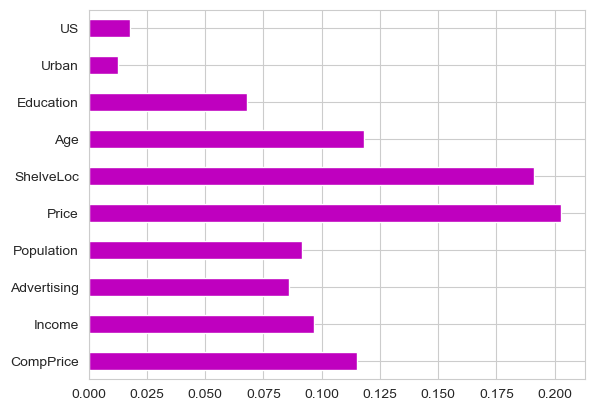

In [29]:
feat_impt=pd.Series(model_train.feature_importances_,index=X.columns)
feat_impt.plot(kind="barh",color="m")

Shelving location,Price,Age,CompPrice are some top attributes contributing to the sales worth.